Here we shall compute the power spectrum using the expansions given in https://arxiv.org/pdf/1904.11917.pdf and https://arxiv.org/pdf/2001.04494.pdf. For conviencience the key equations are given below:
For some function of the field $f(\varphi)$ we have
$$f_n = \int d\varphi \psi_0(\varphi) f(\varphi) \psi_n(\varphi), $$
which gives the temporal correlation function 
$$G_f(t) = \sum_n f^2_n e^{-\Lambda_n t}. $$
The spectral index of $f$ is defined 
$$n_f = 1 + \frac{2\Lambda_n}{H}, $$
such that $n$ denotes the lowest non-zero $f_n$. At long distances $k<<H$ we are given the power spectrum in the form
$$\mathcal{P}_f(k) \simeq A_f(n_f-1)\left(\frac{k}{H}\right)^{n_f-1}, $$
with $A_f = f^2_n$. The density contrast is given as
$$\delta = \frac{\delta\rho_{\varphi}}{\langle\rho_{\varphi}\rangle} = \frac{V(\varphi)-\langle V(\varphi)\rangle}{\langle V(\varphi)\rangle}. $$

In [1]:
import numpy as np
from math import factorial
from scipy import optimize
from scipy.integrate import odeint, simps
from scipy.special import eval_hermite
import matplotlib.pyplot as plt
%matplotlib inline

We begin with the quadratic potential as this has analytic solutions of the form
$$ \psi_n = \frac{\sqrt{m}}{H}\frac{1}{\sqrt{2^n n!}}\left(\frac{4\pi}{3}\right)^{1/4}e^{-\frac{2\pi^2 \tilde{x}^2}{3}}H_n\left(\frac{2\pi\tilde{x}}{\sqrt{3}}\right),$$
where $H_n$ are the Hermite polynomials and 
$$\tilde{x} = \frac{m}{H^2}\varphi. $$
Eigenvalues are given by 
$$ \Lambda_n = \frac{n}{3}\frac{m^2}{H}. $$
In this case the expression for $f_n$ becomes
$$f_n = \frac{1}{\sqrt{2^n n!}}\left(\frac{4\pi}{3}\right)^{1/2}\int^{\infty}_{-\infty}d\tilde{x} \> e^{-\frac{4\pi^2 \tilde{x}^2}{3}}f\left(\frac{H^2}{m} \tilde{x}\right)H_n\left(\frac{2\pi\tilde{x}}{\sqrt{3}}\right).  $$
Considering 
$$f(\varphi) = \varphi = \frac{H^2}{m} \tilde{x}, $$
we find that 
$$\varphi_n = \frac{H^2}{m}\frac{1}{\sqrt{2^n n!}}\left(\frac{4\pi}{3}\right)^{1/2}\int^{\infty}_{-\infty}d\tilde{x} \> e^{-\frac{4\pi^2 \tilde{x}^2}{3}}\tilde{x}H_n\left(\frac{2\pi\tilde{x}}{\sqrt{3}}\right).  $$
The lowest contribution comes from $n=1$ which gives
$$\varphi_1 = \frac{H^2}{m}\frac{1}{\sqrt{2}}\left(\frac{4\pi}{3}\right)^{1/2}\int^{\infty}_{-\infty}d\tilde{x} \> e^{-\frac{4\pi^2 \tilde{x}^2}{3}}\tilde{x}H_1\left(\frac{2\pi\tilde{x}}{\sqrt{3}}\right) $$
$$\varphi_1 = \frac{H^2}{m}\frac{1}{\sqrt{2}}\left(\frac{4\pi}{3}\right)^{1/2}\frac{4\pi}{\sqrt{3}}\int^{\infty}_{-\infty}d\tilde{x} \> \tilde{x}^2 e^{-\frac{4\pi^2 \tilde{x}^2}{3}},$$
which can be integrated by parts to give 
$$\varphi_1 = -\frac{H^2}{m}\frac{1}{\sqrt{2}}\left(\frac{4\pi}{3}\right)^{1/2}\frac{4\pi}{\sqrt{3}}\frac{3}{8\pi^2}\left(\left[\tilde{x}e^{-\frac{4\pi^2 \tilde{x}^2}{3}}\right]^{\infty}_{-\infty}-\int^{\infty}_{-\infty}d\tilde{x} \> e^{-\frac{4\pi^2 \tilde{x}^2}{3}}\right)$$
$$\varphi_1 = \frac{H^2}{m}\frac{1}{\sqrt{2}}\left(\frac{4\pi}{3}\right)^{1/2}\frac{4\pi}{\sqrt{3}}\frac{3}{8\pi^2}\left(\frac{3}{4\pi}\right)^{1/2} = \frac{H^2}{m}\frac{3}{2\pi\sqrt{6}}.$$
We can also compute the spectral index in this case with 
$$n_{\varphi} = 1 +\frac{2\Lambda_1}{H} = 1 + \frac{2m^2}{3H^2}.$$

In [2]:
# Parameters
hubble_rate = 1
mass_squared = np.logspace(-2, -1, 100)

In [3]:
# Spectral coefficient for phi
phi_1 = ((hubble_rate**2)/np.sqrt(mass_squared))*(3/(2*np.pi*np.sqrt(6)))
A_phi = phi_1**2

# Long distance power spectrum for phi
wavevector = np.logspace(-2, 2, 100) # Mpc^-1
power_spectrum_phi = np.zeros((len(mass_squared), len(wavevector)))
hubble_rate_Mpc = ((hubble_rate/(1.9733e-16))/(3.0857e16))/(1e-6)  # Mpc^-1

# Computes power spectrum 
for i in range(len(mass_squared)):
    power_spectrum_phi[i, :] = A_phi[i]*(2*mass_squared[i]/(3*hubble_rate**2))*(wavevector/hubble_rate_Mpc)**(2*mass_squared[i]/(3*hubble_rate**2))

Text(0, 0.5, '$\\mathcal{P}_{\\varphi}(k)$')

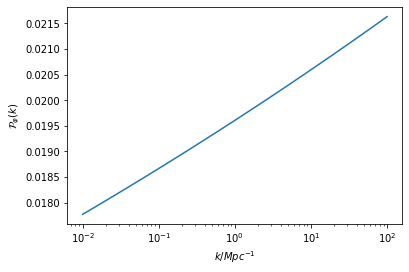

In [4]:
# Plotting
plt.plot(wavevector, power_spectrum_phi[50, :])
plt.xscale("log")
plt.xlabel("$k/Mpc^{-1}$")
plt.ylabel("$\mathcal{P}_{\\varphi}(k)$")

For the density contrast the relevant terms were given as 
$$n_{\delta} = 1 + \frac{4}{3}\frac{m^2}{H^2}, $$
and 
$$A_{\delta} = 2. $$

In [5]:
# A_delta
A_delta = 2

# Long distance power spectrum for delta
wavevector = np.logspace(-2, 2, 100) # Mpc^-1
power_spectrum_delta = np.zeros((len(mass_squared), len(wavevector)))

# Computes power spectrum 
for i in range(len(mass_squared)):
    power_spectrum_delta[i, :] = A_delta*(4*mass_squared[i]/(3*hubble_rate**2))*(wavevector/hubble_rate_Mpc)**(4*mass_squared[i]/(3*hubble_rate**2))

Text(0, 0.5, '$\\mathcal{P}_{\\delta}(k)$')

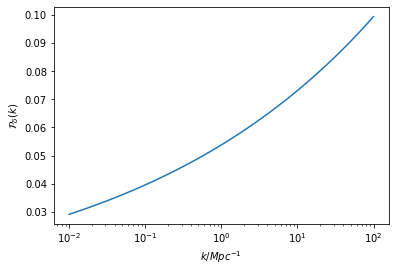

In [6]:
# Plotting
plt.plot(wavevector, power_spectrum_delta[99, :])
plt.xscale("log")
plt.xlabel("$k/Mpc^{-1}$")
plt.ylabel("$\mathcal{P}_{\\delta}(k)$")

Before numerically reproducing the above results we'll need some way getting rid of the divergent parts of the solutions. 

In [7]:
def eigenfunction_slicer(eigenfunction, tolerance):
    '''Function that cuts out the diverging part of the eigenfunction.
    eigenfunction: eigenfunction to be cut
    tolerance: determines at which value we cut off the eigenfunction before it starts diverging'''
    
    # Loops through eigenfunction
    for i in range(1, len(eigenfunction)):
        # Checks how close to zero the eigenfunction is
        if abs(eigenfunction[-i]) < tolerance:
            # Cuts out everything to the right
            eigenfunction[-(i+50):] = np.zeros(len(eigenfunction[-(i+50):]))
            break
    
    return eigenfunction

Solver for the quadratic potential as defined in previous notebooks.

In [8]:
class eigenfunction_finder:
    '''Class for finding the eigenfunction for a given eigenvalue'''
    def __init__(self, V, field):
        '''Initialises the range of field values for which the field is
        to be integrated
        V: array where first entry is the eigenfunction, second is Y
        as defined for the coupled ODE system
        field: field values'''
        self.V = V
        self.field = field
        self.mass_squared = 1
 
    def effective_potential(self, field):
        '''Defines the effective potential in the SL equation'''
    
        W = self.mass_squared*((2*np.pi**2)/(3*hubble_rate**4))*(((4*np.pi**2)/(3*hubble_rate**4))*self.mass_squared*field**2 - 1)
        return W


    def schrodinger_like_ODE(self, V, field):
        '''Computes the derivatives of the Schrodinger-like equation'''

        # Empty array for derivatives
        dV = np.zeros(2)
        # Computes derivatives
        dV[0] = V[1]
        dV[1] = V[0]*(2*self.effective_potential(field) - (8*self.eigenvalue*np.pi**2)/(hubble_rate**3))
        return dV    

    def eigenfunction(self, eigenvalue):
        '''Integrates the eigenfunction for the field based on the given
        field range and returns the projected solution based on the
        eigenvalue'''
        
        self.eigenvalue = eigenvalue
        
        # Integrates to find eigenfunction
        V = odeint(self.schrodinger_like_ODE, self.V, self.field)

        return V[-1,0]
    
    def eigenfunction_full(self, eigenvalue):
        '''Integrates the eigenfunction for the field based on the given
        field range and returns the projected solution based on the
        eigenvalue'''
        
        self.eigenvalue = eigenvalue
        
        # Integrates to find eigenfunction
        V = odeint(self.schrodinger_like_ODE, self.V, self.field)

        return V[:,0]

Below we compute the eigenfunctions and eigenvalues up to $n = 2$ for a range of mass values.

In [9]:
# Field 
field = np.linspace(0, 10, 3000)
dphi = field[1] - field[0]
# Mass squared values
mass_squared = np.logspace(-2, -1, 100)
# Stores eigenfunctions
eigenfunctions = np.zeros((3, len(mass_squared), len(field)))
# Stores eigenvalues
eigenvalues = np.zeros((3, len(mass_squared)))

# Initializing the root solvers
eigenvalue_function_0 = eigenfunction_finder([1, 0], field)
eigenvalue_function_1 = eigenfunction_finder([0, 1], field)
eigenvalue_function_2 = eigenfunction_finder([-1, 0], field)

# Eigenvalue guess range 
lower_eigenvalue_0 = -0.1
upper_eigenvalue_0 = 0.001
lower_eigenvalue_1 = 0.001
upper_eigenvalue_1 = 0.004
lower_eigenvalue_2 = 0.005
upper_eigenvalue_2 = 0.007

# Loops over all mass values
for i in range(len(mass_squared)):
    eigenvalue_function_0.mass_squared = mass_squared[i]
    eigenvalue_function_1.mass_squared = mass_squared[i]
    eigenvalue_function_2.mass_squared = mass_squared[i]
    
    # Adjusts eigenvalue guess range
    if i >= 1:
        lower_eigenvalue_1 = eigenvalue_1*(1 - 1/10)
        upper_eigenvalue_1 = eigenvalue_1*(1 + 1/10)
        lower_eigenvalue_2 = eigenvalue_2*(1 - 1/10)
        upper_eigenvalue_2 = eigenvalue_2*(1 + 1/10)
    
    # Brent solver
    eigenvalue_0 = optimize.brentq(eigenvalue_function_0.eigenfunction, lower_eigenvalue_0 , upper_eigenvalue_0, xtol=1e-6)
    eigenfunction_0 = eigenvalue_function_0.eigenfunction_full(eigenvalue_0)
    eigenvalue_1 = optimize.brentq(eigenvalue_function_1.eigenfunction, lower_eigenvalue_1 , upper_eigenvalue_1, xtol=1e-6)
    eigenfunction_1 = eigenvalue_function_1.eigenfunction_full(eigenvalue_1)
    eigenvalue_2 = optimize.brentq(eigenvalue_function_2.eigenfunction, lower_eigenvalue_2 , upper_eigenvalue_2, xtol=1e-6)
    eigenfunction_2 = eigenvalue_function_2.eigenfunction_full(eigenvalue_2)
    
    # Slice eigenfunctions 
    eigenfunction_0 = eigenfunction_slicer(eigenfunction_0, 1e-2)
    eigenfunction_1 = eigenfunction_slicer(eigenfunction_1, 1e-2)
    eigenfunction_2 = eigenfunction_slicer(eigenfunction_2, 1e-2)
    
    # Normalisation 
    eigenfunction_0 = eigenfunction_0/np.sqrt(2*simps(eigenfunction_0**2, field[:len(eigenfunction_0)], dphi))
    eigenfunction_1 = eigenfunction_1/np.sqrt(2*simps(eigenfunction_1**2, field[:len(eigenfunction_1)], dphi))
    eigenfunction_2 = eigenfunction_2/np.sqrt(2*simps(eigenfunction_2**2, field[:len(eigenfunction_2)], dphi))
   
    # Store computed quantities 
    eigenvalues[0, i] = eigenvalue_0
    eigenvalues[1, i] = eigenvalue_1
    eigenvalues[2, i] = eigenvalue_2
    eigenfunctions[0, i, :] = eigenfunction_0
    eigenfunctions[1, i, :] = eigenfunction_1
    eigenfunctions[2, i, :] = eigenfunction_2

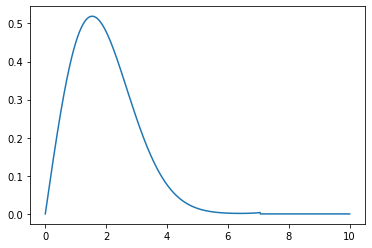

In [10]:
# Plot of example eigenfunction
plt.plot(field, eigenfunctions[1, 50])

In [11]:
# Array to store spectral coefficient for phi
numerical_phi_1 = np.zeros(len(mass_squared))
numerical_A_phi = np.zeros(len(mass_squared))

# Long distance power spectrum for phi
wavevector = np.logspace(-2, 2, 100) # Mpc^-1
numerical_power_spectrum_phi = np.zeros((len(mass_squared), len(wavevector))) 
hubble_rate_Mpc = ((hubble_rate/(1.9733e-16))/(3.0857e16))/(1e-6)  # Mpc^-1

# Computes power spectrum 
for i in range(len(mass_squared)):
    numerical_phi_1[i] = 2*simps(eigenfunctions[0, i]*eigenfunctions[1, i]*field, field, dphi)
    numerical_A_phi[i] = numerical_phi_1[i]**2
    numerical_power_spectrum_phi[i, :] = numerical_A_phi[i]*(2*eigenvalues[1, i]/hubble_rate)*(wavevector/hubble_rate_Mpc)**(2*eigenvalues[1, i]/hubble_rate)
    

Text(0, 0.5, '$\\mathcal{P}_{\\varphi}(k)$')

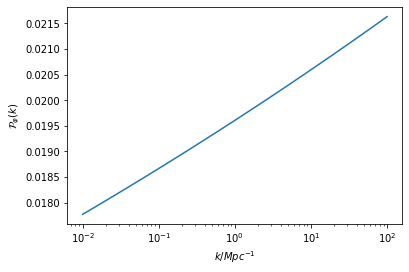

In [12]:
# Plotting
plt.plot(wavevector, numerical_power_spectrum_phi[50, :])
plt.xscale("log")
plt.xlabel("$k/Mpc^{-1}$")
plt.ylabel("$\mathcal{P}_{\\varphi}(k)$")

Below we compare the analytical and numerical result for $A_{\varphi}$.

Text(0, 0.5, '$\\% $ error')

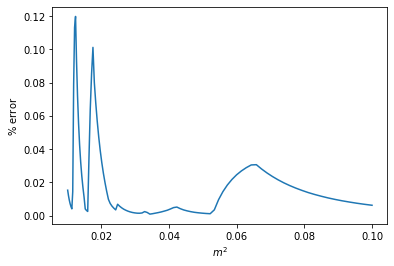

In [13]:
# Computes error in numerical approach vs analytical
error_phi = 100*abs(numerical_A_phi - A_phi)/A_phi
plt.plot(mass_squared, error_phi)
plt.xlabel("$m^2$")
plt.ylabel("$\\% $ error")

Text(0, 0.5, 'log error')

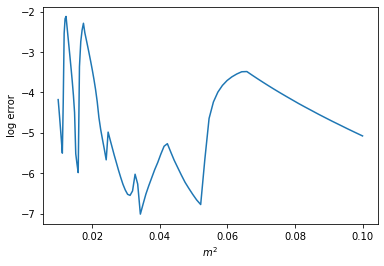

In [14]:
# Log of error
plt.plot(mass_squared, np.log(error_phi))
plt.xlabel("$m^2$")
plt.ylabel("log error")

In [15]:
# Array to store spectral coefficient for delta
numerical_A_delta = np.zeros(len(mass_squared))

# Long distance power spectrum for delta
wavevector = np.logspace(-2, 2, 100) # Mpc^-1
numerical_power_spectrum_delta = np.zeros((len(mass_squared), len(wavevector))) 
hubble_rate_Mpc = ((hubble_rate/(1.9733e-16))/(3.0857e16))/(1e-6)  # Mpc^-1

# Computes power spectrum 
for i in range(len(mass_squared)):
    numerical_phi_squared_2 = 2*simps(eigenfunctions[0, i]*eigenfunctions[2, i]*field**2, field, dphi) 
    numerical_phi_squared_average = 2*simps(eigenfunctions[0, i]*eigenfunctions[0, i]*field**2, field, dphi) 
    numerical_A_delta[i] = (numerical_phi_squared_2/numerical_phi_squared_average)**2
    numerical_power_spectrum_delta[i, :] = numerical_A_delta[i]*(2*eigenvalues[2, i]/hubble_rate)*(wavevector/hubble_rate_Mpc)**(2*eigenvalues[2, i]/hubble_rate)

Text(0, 0.5, '$\\mathcal{P}_{\\delta}(k)$')

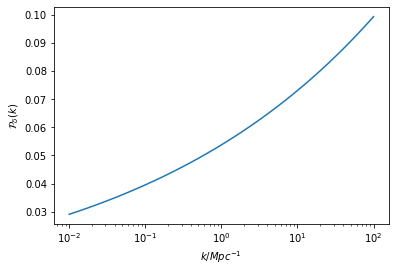

In [16]:
# Plotting
plt.plot(wavevector, numerical_power_spectrum_delta[99, :])
plt.xscale("log")
plt.xlabel("$k/Mpc^{-1}$")
plt.ylabel("$\mathcal{P}_{\\delta}(k)$")

Below we compare the analytical and numerical result for $A_{\delta}$.

Text(0, 0.5, '$\\% $ error')

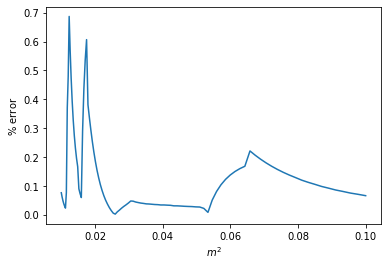

In [17]:
# Compute error
error_delta = 100*abs(numerical_A_delta - A_delta)/A_delta
plt.plot(mass_squared, error_delta)
plt.xlabel("$m^2$")
plt.ylabel("$\\% $ error")

Text(0, 0.5, 'log error')

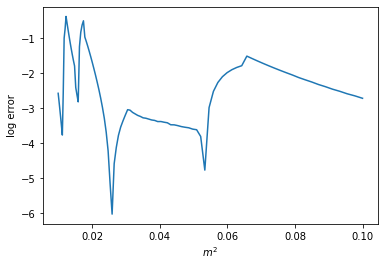

In [18]:
# Plot log of error
plt.plot(mass_squared, np.log(error_delta))
plt.xlabel("$m^2$")
plt.ylabel("log error")

In [19]:
# Compute error in the power spectrum
error_power_spectrum_phi = 100*abs(numerical_power_spectrum_phi - power_spectrum_phi)/power_spectrum_phi
error_power_spectrum_delta = 100*abs(numerical_power_spectrum_delta - power_spectrum_delta)/power_spectrum_delta

We then look at errors in one of the power spectra.

Text(0, 0.5, '$\\%$ error')

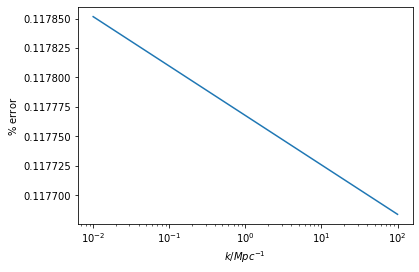

In [20]:
# Error of power spectrum for phi
plt.plot(wavevector, error_power_spectrum_phi[9])
plt.xscale("log")
plt.xlabel("$k/Mpc^{-1}$")
plt.ylabel("$\\%$ error")

Text(0, 0.5, '$\\%$ error')

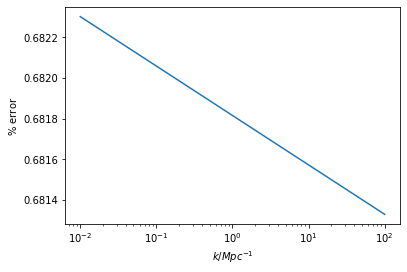

In [21]:
# Error of power spectrum for delta
plt.plot(wavevector, error_power_spectrum_delta[9])
plt.xscale("log")
plt.xlabel("$k/Mpc^{-1}$")
plt.ylabel("$\\%$ error")

Now we consider the quartic potential
$$V(\varphi) = \frac{1}{2}m^2 \varphi^2 + \frac{1}{4}\lambda \varphi^4. $$
We use the following definitions: 
$$ \alpha \equiv \frac{m^2}{\sqrt{\lambda}H^2}.  $$
$$ z \equiv \frac{\lambda^{1/4}\Omega}{H}\varphi, \>\> \Omega \equiv 1 + \sqrt{\alpha}. $$
With the above parameters the Schrödinger-like equation takes the form 
$$\frac{\partial \Phi_n(z)}{\partial z} \equiv Y, $$
$$\frac{\partial Y}{\partial z} = \left(-\frac{4\pi^2 \alpha}{3\Omega^2}-4\pi^2\frac{1-\frac{4\pi^2}{9}\alpha^2}{\Omega^4}z^2+\frac{32\pi^4\alpha z^4}{9\Omega^6} + \frac{16\pi^4 z^6}{9\Omega^8}-\frac{8\pi^2(1+\alpha)\tilde{\Lambda}(\alpha)}{\Omega^2}\right)\Phi_n(z).  $$
Eigenvalues are rescaled as 
$$\tilde{\Lambda}_n(\alpha) = \frac{\Lambda_n}{\lambda^{1/2}H(1+\alpha)} $$

In [22]:
class eigenfunction_finder_rescaled:
    '''Class for finding the eigenfunction for a the rescaled parameters z and alpha'''
    def __init__(self, V, z):
        '''Initialises the range of rescaled field values for which the field is
        to be integrated
        V: array where first entry is the eigenfunction, second is Y
        as defined for the coupled ODE system
        z: rescaled field values'''
        self.V = V
        self.z = z       
        
        # Parameters
        self.alpha = 1
 
    def schrodinger_like_ODE(self, V, z):
        '''Computes the derivatives of the Schrodinger-like equation'''
        
        # Empty array for derivatives
        dV = np.zeros(2)
        
        # Determines omega and calculates quantities in the Schrodinger-like equation
        if self.alpha > 0: 
            omega = 1 + np.sqrt(self.alpha)
            
            # Dummy variables that form the various terms in the Schrodinger-like equation
            x_1 = - (4*self.alpha*np.pi**2)/(3*omega**2) - ((4*np.pi**2)*(1 - 4*((np.pi*self.alpha)**2)/9)/(omega**4))*z**2
            x_2 = (32*self.alpha*(np.pi*z)**4)/(9*omega**6) + (16*(np.pi**4)*z**6)/(9*omega**8)
            x_3 = -(8*self.eigenvalue*(1 + self.alpha)*np.pi**2)/(omega**2)
            
        else:
            omega = 1 + np.sqrt(-self.alpha)
            
            # Dummy variables that form the various terms in the Schrodinger-like equation
            x_1 = - (4*self.alpha*np.pi**2)/(3*omega**2) - ((4*np.pi**2)*(1 - 4*((np.pi*self.alpha)**2)/9)/(omega**4))*z**2
            x_2 = (32*self.alpha*(np.pi*z)**4)/(9*omega**6) + (16*(np.pi**4)*z**6)/(9*omega**8)
            x_3 = -(8*self.eigenvalue*(1 - self.alpha)*np.pi**2)/(omega**2)
            
        # Computes derivatives
        dV[0] = V[1]
        dV[1] = V[0]*(x_1 + x_2 + x_3)
        return dV    

    def eigenfunction(self, eigenvalue):
        '''Integrates the eigenfunction for the field based on the given
        field range and returns the projected solution based on the
        eigenvalue'''
        
        self.eigenvalue = eigenvalue
        
        # Integrates to find eigenfunction
        V = odeint(self.schrodinger_like_ODE, self.V, self.z)
        
        return V[-1,0]
    
    def eigenfunction_full(self, eigenvalue):
        '''Integrates the eigenfunction for the field based on the given
        field range and returns the projected solution based on the
        eigenvalue'''
        
        self.eigenvalue = eigenvalue
        
        # Integrates to find eigenfunction
        V = odeint(self.schrodinger_like_ODE, self.V, self.z)

        return V[:,0]

In [28]:
# Field 
z = np.linspace(0, 3, 3000)
dz = z[1] - z[0]

# Generates range of alpha values
alpha = np.logspace(-2, 2, 100)
self_coupling = 1e-4
omega = 1 + np.sqrt(alpha) 

# Stores eigenfunctions
eigenfunctions = np.zeros((3, len(alpha), len(z)))
# Stores eigenvalues
eigenvalues = np.zeros((3, len(alpha)))

# Initializing the root solvers
eigenvalue_function_0 = eigenfunction_finder_rescaled([1, 0], z)
eigenvalue_function_1 = eigenfunction_finder_rescaled([0, 1], z)
eigenvalue_function_2 = eigenfunction_finder_rescaled([-1, 0], z)

# Eigenvalue guess range 
lower_eigenvalue_0 = -0.1
upper_eigenvalue_0 = 0.001
lower_eigenvalue_1 = 0.05
upper_eigenvalue_1 = 0.35
lower_eigenvalue_2 = 0.2
upper_eigenvalue_2 = 0.7

# Loops over all mass values
for i in range(len(alpha)):
    eigenvalue_function_0.alpha = alpha[i]
    eigenvalue_function_1.alpha = alpha[i]
    eigenvalue_function_2.alpha = alpha[i]
    
    # Adjusts eigenvalue guess range
    if i >= 1:
        lower_eigenvalue_1 = eigenvalue_1*(1 - 1/10)
        upper_eigenvalue_1 = eigenvalue_1*(1 + 1/10)
        lower_eigenvalue_2 = eigenvalue_2*(1 - 1/10)
        upper_eigenvalue_2 = eigenvalue_2*(1 + 1/10)
    
    # Brent solver
    eigenvalue_0 = optimize.brentq(eigenvalue_function_0.eigenfunction, lower_eigenvalue_0 , upper_eigenvalue_0, xtol=1e-6)
    eigenfunction_0 = eigenvalue_function_0.eigenfunction_full(eigenvalue_0)
    eigenvalue_1 = optimize.brentq(eigenvalue_function_1.eigenfunction, lower_eigenvalue_1 , upper_eigenvalue_1, xtol=1e-6)
    eigenfunction_1 = eigenvalue_function_1.eigenfunction_full(eigenvalue_1)
    eigenvalue_2 = optimize.brentq(eigenvalue_function_2.eigenfunction, lower_eigenvalue_2 , upper_eigenvalue_2, xtol=1e-6)
    eigenfunction_2 = eigenvalue_function_2.eigenfunction_full(eigenvalue_2)
    
    # Slice eigenfunctions 
    eigenfunction_0 = eigenfunction_slicer(eigenfunction_0, 1e-2)
    eigenfunction_1 = eigenfunction_slicer(eigenfunction_1, 1e-2)
    eigenfunction_2 = eigenfunction_slicer(eigenfunction_2, 1e-2)
    
    # Normalisation 
    eigenfunction_0 = eigenfunction_0/np.sqrt(2*simps(eigenfunction_0**2, z[:len(eigenfunction_0)], dz))
    eigenfunction_1 = eigenfunction_1/np.sqrt(2*simps(eigenfunction_1**2, z[:len(eigenfunction_1)], dz))
    eigenfunction_2 = eigenfunction_2/np.sqrt(2*simps(eigenfunction_2**2, z[:len(eigenfunction_2)], dz))
   
    # Store computed quantities 
    eigenvalues[0, i] = eigenvalue_0
    eigenvalues[1, i] = eigenvalue_1
    eigenvalues[2, i] = eigenvalue_2
    eigenfunctions[0, i, :] = eigenfunction_0
    eigenfunctions[1, i, :] = eigenfunction_1
    eigenfunctions[2, i, :] = eigenfunction_2

$$ V(z) = \frac{\alpha H^4}{2\Omega^2} z^2 + \frac{H^4}{4\Omega^4}z^4 $$

In [29]:
# Calculating unscaled eigenvalue
eigenvalues[0, :] = eigenvalues[0, :]*hubble_rate*np.sqrt(self_coupling)*(1 + alpha)
eigenvalues[1, :] = eigenvalues[1, :]*hubble_rate*np.sqrt(self_coupling)*(1 + alpha)
eigenvalues[2, :] = eigenvalues[2, :]*hubble_rate*np.sqrt(self_coupling)*(1 + alpha)

In [30]:
# Array to store spectral coefficient for delta
quartic_A_delta = np.zeros(len(mass_squared))

# Potential in terms of z
quartic_potential_z = np.outer(alpha/(2*omega**2), z) + 0.25*(hubble_rate*np.outer(1/omega, z))**4

# Long distance power spectrum for delta
wavevector = np.logspace(-2, 2, 100) # Mpc^-1
quartic_power_spectrum_delta = np.zeros((len(alpha), len(wavevector))) 
hubble_rate_Mpc = ((hubble_rate/(1.9733e-16))/(3.0857e16))/(1e-6)  # Mpc^-1

# Computes power spectrum 
for i in range(len(alpha)):
    average_potential = 2*simps(quartic_potential_z[i]*eigenfunctions[0, i]**2, z, dz) 
    quartic_delta_2 = 2*simps(quartic_potential_z[i]*eigenfunctions[0, i]*eigenfunctions[2, i], z, dz)/average_potential 
    quartic_A_delta[i] = quartic_delta_2**2
    quartic_power_spectrum_delta[i, :] = quartic_A_delta[i]*(2*eigenvalues[2, i]/hubble_rate)*(wavevector/hubble_rate_Mpc)**(2*eigenvalues[2, i]/hubble_rate)

Text(0, 0.5, '$\\mathcal{P}_{\\delta}(k)$')

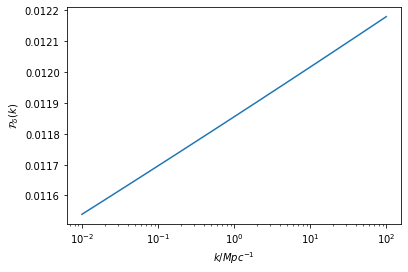

In [31]:
# Plotting
plt.plot(wavevector, quartic_power_spectrum_delta[1, :])
plt.xscale("log")
plt.xlabel("$k/Mpc^{-1}$")
plt.ylabel("$\mathcal{P}_{\\delta}(k)$")

## Choosing values for the parameters
Here we consider the choice of values for the Hubble rate and parameters in the potential.
For the Hubble rate the upper limit is https://arxiv.org/pdf/1711.07344.pdf
$$H = 8.76 \times 10^{13} \text{ GeV} $$

For the mass various WIMP models seem to range from few around ~ 10 GeV https://arxiv.org/abs/astro-ph/0503486 to ~ 100 TeV https://inspirehep.net/literature/281519 in the more extreme cases.  

A lower bound on the self-coupling is given in https://arxiv.org/abs/1811.02586 to be $\lambda = 0.45$.

In [50]:
# Field 
z = np.linspace(0, 3, 3000)
dz = z[1] - z[0]

# Parameters
hubble_rate = np.linspace(8.76e13, 8.76e10, 10)
mass = np.logspace(1, 5, 50)
mass_squared = mass**2
self_coupling = np.linspace(0.45, 10, 20)

# Alpha for the various combinations of parameters
alpha = np.zeros((len(hubble_rate), len(mass_squared), len(self_coupling)))
omega = np.zeros((len(hubble_rate), len(mass_squared), len(self_coupling)))
potential = np.zeros((len(hubble_rate), len(mass_squared), len(self_coupling), len(z)))
for i in range(len(hubble_rate)):
    for j in range(len(mass_squared)):
        for k in range(len(self_coupling)):
            alpha[i, j, k] = mass_squared[j]/(np.sqrt(self_coupling[k])*hubble_rate[i]**2)
            omega[i, j, k] =  1 + np.sqrt(alpha[i, j, k])
            for l in range(len(z)):
                potential[i, j, k, l] = (0.5*alpha[i,j,k]*(z[l]/omega[i, j, k])**2 + 0.25*(z[l]/omega[i, j, k])**4)*hubble_rate[i]**4
alpha

array([[[1.94260960e-26, 1.33514767e-26, 1.08024190e-26, ...,
         4.34507780e-27, 4.22853710e-27, 4.12089727e-27],
        [2.82911653e-26, 1.94444027e-26, 1.57320865e-26, ...,
         6.32794743e-27, 6.15822356e-27, 6.00146246e-27],
        [4.12017956e-26, 2.83178263e-26, 2.29114003e-26, ...,
         9.21569661e-27, 8.96851951e-27, 8.74022071e-27],
        ...,
        [9.15914466e-19, 6.29504282e-19, 5.09319622e-19, ...,
         2.04864612e-19, 1.99369873e-19, 1.94294799e-19],
        [1.33389064e-18, 9.16777602e-19, 7.41746856e-19, ...,
         2.98354265e-19, 2.90352011e-19, 2.82960935e-19],
        [1.94260960e-18, 1.33514767e-18, 1.08024190e-18, ...,
         4.34507780e-19, 4.22853710e-19, 4.12089727e-19]],

       [[2.45800074e-26, 1.68937389e-26, 1.36683943e-26, ...,
         5.49786454e-27, 5.35040458e-27, 5.21420697e-27],
        [3.57970563e-26, 2.46031710e-26, 1.99059452e-26, ...,
         8.00680665e-27, 7.79205356e-27, 7.59370238e-27],
        [5.21329885e-26, 

In [84]:
def eigenfunction_slicer(eigenfunction):
    '''Function that cuts out the diverging part of the eigenfunction.
    eigenfunction: eigenfunction to be cut'''
    
    # Loops through eigenfunction
    for i in range(1, len(eigenfunction)):
        # Checks how close to zero the eigenfunction is
        if abs(eigenfunction[-i]) < abs(eigenfunction[-(i + 1)]):
            # Cuts out everything to the right
            eigenfunction[-i:] = np.zeros(len(eigenfunction[-i:]))
            break
    
    return eigenfunction

In [120]:
# Field 
z = np.linspace(0, 3, 3000)
dz = z[1] - z[0]

# Stores eigenfunctions
eigenfunctions = np.zeros((3, len(hubble_rate), len(mass_squared), len(self_coupling), len(z)))
# Stores eigenvalues
eigenvalues = np.zeros((3, len(hubble_rate), len(mass_squared), len(self_coupling)))

# Initializing the root solvers
eigenvalue_function_0 = eigenfunction_finder_rescaled([1, 0], z)
eigenvalue_function_1 = eigenfunction_finder_rescaled([0, 1], z)
eigenvalue_function_2 = eigenfunction_finder_rescaled([-1, 0], z)

# Eigenvalue guess range 
lower_eigenvalue_0 = -0.1
upper_eigenvalue_0 = 0.001
lower_eigenvalue_1 = 0.05
upper_eigenvalue_1 = 0.35
lower_eigenvalue_2 = 0.2
upper_eigenvalue_2 = 0.7

# Loops over parameter combinations
for i in range(len(hubble_rate)):
    for j in range(len(mass_squared)):
        # Eigenvalue guess range 
        lower_eigenvalue_0 = -0.1
        upper_eigenvalue_0 = 0.001
        lower_eigenvalue_1 = 0.05
        upper_eigenvalue_1 = 0.35
        lower_eigenvalue_2 = 0.2
        upper_eigenvalue_2 = 0.7
        for k in range(len(self_coupling)):
            eigenvalue_function_0.alpha = alpha[i, j, k]
            eigenvalue_function_1.alpha = alpha[i, j, k]
            eigenvalue_function_2.alpha = alpha[i, j, k]
    
            # Adjusts eigenvalue guess range
            if k >= 1:
                lower_eigenvalue_1 = eigenvalue_1*(1 - 1/10)
                upper_eigenvalue_1 = eigenvalue_1*(1 + 1/10)
                lower_eigenvalue_2 = eigenvalue_2*(1 - 1/10)
                upper_eigenvalue_2 = eigenvalue_2*(1 + 1/10)
    
            # Brent solver
            eigenvalue_0 = optimize.brentq(eigenvalue_function_0.eigenfunction, lower_eigenvalue_0 , upper_eigenvalue_0, xtol=1e-6)
            eigenfunction_0 = eigenvalue_function_0.eigenfunction_full(eigenvalue_0)
            eigenvalue_1 = optimize.brentq(eigenvalue_function_1.eigenfunction, lower_eigenvalue_1 , upper_eigenvalue_1, xtol=1e-6)
            eigenfunction_1 = eigenvalue_function_1.eigenfunction_full(eigenvalue_1)
            eigenvalue_2 = optimize.brentq(eigenvalue_function_2.eigenfunction, lower_eigenvalue_2 , upper_eigenvalue_2, xtol=1e-6)
            eigenfunction_2 = eigenvalue_function_2.eigenfunction_full(eigenvalue_2)
    
            # Slice eigenfunctions 
            eigenfunction_0 = eigenfunction_slicer(eigenfunction_0)
            eigenfunction_1 = eigenfunction_slicer(eigenfunction_1)
            eigenfunction_2 = eigenfunction_slicer(eigenfunction_2)
    
            # Normalisation 
            eigenfunction_0 = eigenfunction_0/np.sqrt(2*simps(eigenfunction_0**2, z[:len(eigenfunction_0)], dz))
            eigenfunction_1 = eigenfunction_1/np.sqrt(2*simps(eigenfunction_1**2, z[:len(eigenfunction_1)], dz))
            eigenfunction_2 = eigenfunction_2/np.sqrt(2*simps(eigenfunction_2**2, z[:len(eigenfunction_2)], dz))
   
            # Store computed quantities 
            eigenvalues[0, i, j, k] = eigenvalue_0
            eigenvalues[1, i, j, k] = eigenvalue_1
            eigenvalues[2, i, j, k] = eigenvalue_2
            eigenfunctions[0, i, j, k, :] = eigenfunction_0
            eigenfunctions[1, i, j, k, :] = eigenfunction_1
            eigenfunctions[2, i, j, k, :] = eigenfunction_2

The power spectrum for the spectator field was given above to be
$$\mathcal{P}_f(k) \simeq A_f(n_f-1)\left(\frac{k}{H}\right)^{n_f-1}, $$
so the amplitude is
$$A^*_f = A_f(n_f-1). $$

In [121]:
# Array to store spectral coefficient for delta
quartic_A_delta = np.zeros((len(hubble_rate), len(mass_squared), len(self_coupling)))
A_delta_star = np.zeros((len(hubble_rate), len(mass_squared), len(self_coupling)))
log_A = np.zeros((len(hubble_rate), len(mass_squared), len(self_coupling)))

# Array for unscaled eigenvalues
eigenvalues_unscaled = np.zeros(np.shape(eigenvalues))


# Computes density contrast amplitude
for i in range(len(hubble_rate)):
    for j in range(len(mass_squared)):
        for k in range(len(self_coupling)):
            average_potential = 2*simps(potential[i, j, k]*eigenfunctions[0, i, j , k]**2, z, dz) 
            quartic_delta_2 = 2*simps(potential[i, j, k]*eigenfunctions[0, i, j, k]*eigenfunctions[2, i, j, k], z, dz)/average_potential 
            quartic_A_delta[i, j, k] = quartic_delta_2**2
            eigenvalues_unscaled[0, i, j, k] = eigenvalues[0, i, j, k]*(1 + alpha[i, j, k])*np.sqrt(self_coupling[k])*hubble_rate[i]
            eigenvalues_unscaled[1, i, j, k] = eigenvalues[1, i, j, k]*(1 + alpha[i, j, k])*np.sqrt(self_coupling[k])*hubble_rate[i]
            eigenvalues_unscaled[2, i, j, k] = eigenvalues[2, i, j, k]*(1 + alpha[i, j, k])*np.sqrt(self_coupling[k])*hubble_rate[i]
            A_delta_star[i, j, k] = quartic_A_delta[i, j, k]*2*eigenvalues_unscaled[2, i, j, k]/hubble_rate[i]
            log_A[i, j, k] = np.log(A_delta_star[i, j, k]*10**10)

We compare the amplitude to that of the primordial power spectrum which is given in Planck https://arxiv.org/pdf/1807.06211.pdf to be 
$$\ln{10^{10} A_s} =  3.040 \pm 0.016.$$
For the range of values considered the amplitude seems to always exceed that of the primordial power spectrum.

In [125]:
np.min(A_delta_star)

0.9830248589905379

In [123]:
np.min(log_A)

23.008730059687597